In [26]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objects as go
import warnings

init_notebook_mode(connected=True)

warnings.filterwarnings("ignore")

%matplotlib inline

In [27]:
# from google.colab import files
# uploaded = files.upload()
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [28]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [29]:
file_id = "1ymI30vvIKRS2kQFoHQqCuLRxlCP9zIDD"
downloaded = drive.CreateFile({'id':file_id}) 
downloaded.GetContentFile('Accidents_data_file.csv')  
data = pd.read_csv('Accidents_data_file.csv')


In [30]:
data.shape

(2906610, 47)

In [31]:
data.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [32]:
data.isna().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                   282821
End_Lng                   282821
Distance(mi)                   0
Description                    0
Number                   1891672
Street                         0
Side                           0
City                         108
County                         0
State                          0
Zipcode                     1114
Country                        0
Timezone                    3430
Airport_Code                6608
Weather_Timestamp          46917
Temperature(F)             67224
Wind_Chill(F)            1183859
Humidity(%)                71270
Pressure(in)               56908
Visibility(mi)             72078
Wind_Direction             63474
Wind_Speed(mph)           307163
Precipitation(in)        1301326
Weather_Condition          71851
Amenity   

In [33]:
data.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.0,Accident on Tanner Rd at Pennbrooke Ln.,439.0,Tanner Rd,R,Greenville,Greenville,SC,29607-6027,US,US/Eastern,KGMU,2019-05-21 08:53:00,76.0,76.0,52.0,28.91,10.0,N,7.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.0,Accident on Houston Branch Rd at Providence Br...,3299.0,Providence Branch Ln,R,Charlotte,Mecklenburg,NC,28270-8560,US,US/Eastern,KEQY,2019-10-07 17:53:00,76.0,76.0,62.0,29.30,10.0,VAR,3.0,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.4,Stationary traffic on CA-17 from Summit Rd (CA...,NaN,Santa Cruz Hwy,R,Los Gatos,Santa Clara,CA,95033,US,US/Pacific,KSJC,2020-12-13 21:53:00,51.0,51.0,80.0,30.17,10.0,W,6.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,0.0,Accident on US-395 Southbound at Topsy Ln.,NaN,US Highway 395 S,R,Carson City,Douglas,NV,89705,US,US/Pacific,KCXP,2018-04-17 16:55:00,53.6,NaN,16.0,30.16,10.0,SSW,4.6,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,0.0,Accident on I-595 Westbound at Exit 4 / Pine I...,NaN,I-595 W,R,Fort Lauderdale,Broward,FL,33324,US,US/Eastern,KHWO,2016-08-31 17:53:00,84.2,NaN,84.0,29.92,10.0,SSE,13.8,NaN,Overcast,False,False,False,False,True,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [34]:
data['Start_Time'] = pd.to_datetime(data['Start_Time'])
data['End_Time'] = pd.to_datetime(data['End_Time'])

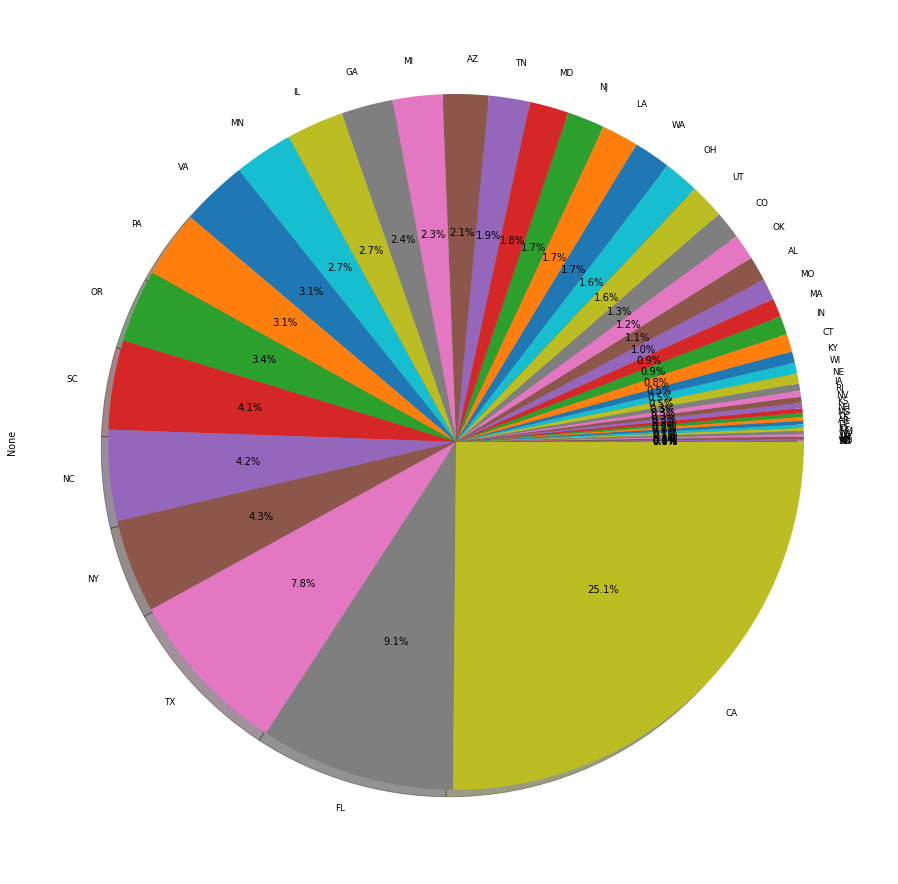

In [37]:
data.groupby(by = 'State').size().sort_values().plot.pie(autopct = '%1.1f%%',shadow = True, figsize = (16,16))

In [38]:
top_10_state = data[['City','State' , 'Severity']].groupby('State').agg({'City' : 'count' , 
                                                       'Severity' : 'mean' }).sort_values(
    by='City',ascending=False).head(10)

In [39]:
df_state_city = data[['State' , 'City','Severity']].groupby(['State' , 'City']).count().rename(columns = {'Severity' : 'Count'})

top_10_city = df_state_city.sort_values(by='Count' , ascending = False).head(10)

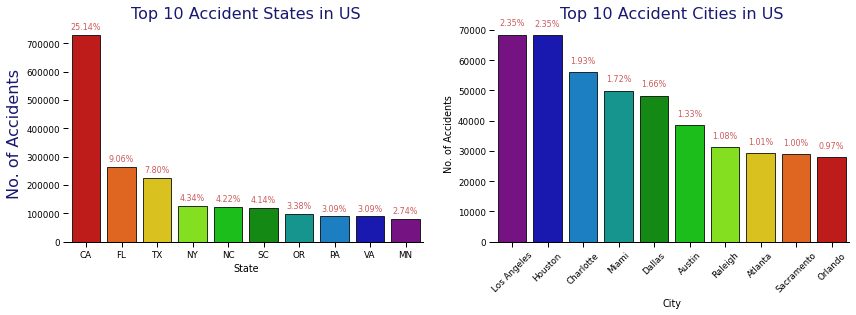

In [40]:
fig , (ax1, ax2) = plt.subplots(1,2,figsize=(14,4))

bar = sns.barplot(x=top_10_state.index , y=top_10_state['City'],
                  palette='nipy_spectral_r' , 
#   
                  edgecolor = 'black',
                  ax=ax1 )
sns.despine(left = True )
ax1.set_xlabel("State")
ax1.set_ylabel("No. of Accidents" , fontdict = {'fontsize':16 , 'color':'MidnightBlue'})
ax1.set_title('Top 10 Accident States in US', fontdict = {'fontsize':16 , 'color':'MidnightBlue'})

bar = sns.barplot(x=top_10_city.index.get_level_values(1) , y=top_10_city['Count'],
                  palette='nipy_spectral' ,  
                  edgecolor = 'black',
                  ax=ax2
                 )
sns.despine(left = True )
ax2.set_xlabel("City" )
ax2.set_ylabel("No. of Accidents")
ax2.set_title('Top 10 Accident Cities in US', fontdict = {'fontsize':16 , 'color':'MidnightBlue'})
plt.xticks(rotation = 45)


# Working to get labels
total_accidents = len(data)

for p in ax1.patches :
    height = p.get_height()
    ax1.text(p.get_x() + p.get_width()/2,
            height + 20000,
            '{:.2f}%'.format(height/total_accidents*100),
            ha = "center",
            fontsize = 8, color='indianred')

    
# for City
for p in ax2.patches :
    height = p.get_height()
    ax2.text(p.get_x() + p.get_width()/2,
            height + 3000,
            '{:.2f}%'.format(height/total_accidents*100),
            ha = "center",
            fontsize = 8, color='indianred')
    
    
fig.show()

In [41]:
data['Year'] = data['Start_Time'].dt.year
data['Month'] = data['Start_Time'].dt.month 
data['Hour'] = data['Start_Time'].dt.hour
diff = data['End_Time'] - data['Start_Time']
data['DelayTime'] = round(diff.dt.seconds/3600,1)
year = data['Year'].value_counts()
month = data['Month'].value_counts().sort_index()
month_map = {1:'Jan' , 2:'Feb' , 3:'Mar' , 4:'Apr' , 5:'May' , 6:'Jun', 7:'Jul' , 8:'Aug' 
             , 9:'Sep',10:'Oct' , 11:'Nov' , 12:'Dec'}

hour_severity = data[['Hour' , 'Severity']].groupby('Hour').agg({'Hour' : 'count' , 'Severity' : 'mean'})

data['Day'] = data['Start_Time'].dt.dayofweek
day_severity = data[['Day' , 'Severity']].groupby('Day').agg({'Day' : 'count' , 'Severity' : 'mean'})
day_map = {0:'Monday' , 1:'Tueday' , 2:'Wedday' , 3:"Thuday" , 4:'Friday' , 5:"Saturday" , 6:'Sunday'}


In [42]:
hour_severity = data[['Hour' , 'Severity']].groupby('Hour').agg({'Hour' : 'count' , 'Severity' : 'mean'})

data['Day'] = data['Start_Time'].dt.dayofweek
day_severity = data[['Day' , 'Severity']].groupby('Day').agg({'Day' : 'count' , 'Severity' : 'mean'})
day_map = {0:'Monday' , 1:'Tueday' , 2:'Wedday' , 3:"Thuday" , 4:'Friday' , 5:"Saturday" , 6:'Sunday'}

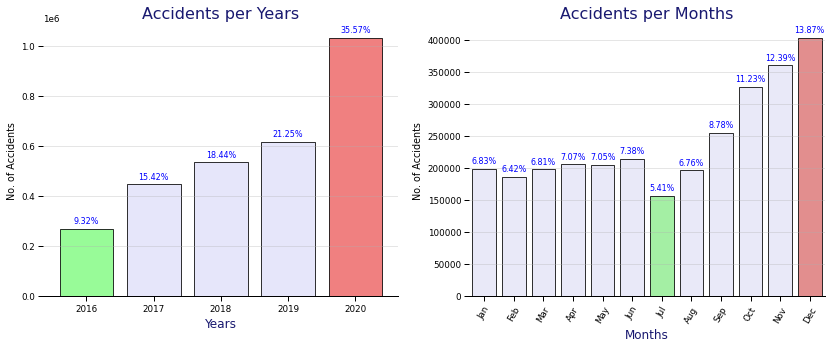

In [43]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,5))


# plot for year

light_palette = sns.color_palette(palette='pastel')

year_color_map = ['Lavender' for _ in range(5)]
year_color_map[0] = 'LightCoral' #light_palette[0]
year_color_map[4] = 'PaleGreen' #light_palette[2]

years = ax1.bar(year.index.values , year, color=year_color_map , edgecolor = 'black')
ax1.spines[('top')].set_visible(False)
ax1.spines[('right')].set_visible(False)
ax1.set_xlabel("Years", fontdict = {'fontsize':12 , 'color':'MidnightBlue'} )
ax1.set_ylabel("No. of Accidents")
ax1.set_title('Accidents per Years', fontdict = {'fontsize':16 , 'color':'MidnightBlue'})

for p in ax1.patches :
    height = p.get_height()
    ax1.text(p.get_x() + p.get_width()/2,
            height + 20000,
            '{:.2f}%'.format(height/total_accidents*100),
            ha = "center",
            fontsize = 8, color='Blue')

    month_color_map = ['Lavender' for _ in range(12)]
month_color_map[11] = 'LightCoral' #light_palette[0]
month_color_map[6] = 'PaleGreen' #light_palette[2]

m = sns.barplot( x= month.index.map(month_map), y=month,  ax = ax2, palette=month_color_map , edgecolor='black' )
plt.xticks(rotation=60)
ax2.set_xlabel("Months", fontdict = {'fontsize':12 , 'color':'MidnightBlue'} )
ax2.set_ylabel("No. of Accidents")
ax2.set_title('Accidents per Months', fontdict = {'fontsize':16 , 'color':'MidnightBlue'})
sns.despine(left=True)

for p in ax2.patches :
    height = p.get_height()
    ax2.text(p.get_x() + p.get_width()/2,
            height + 8000,
            '{:.2f}%'.format(height/total_accidents*100),
            ha = "center",
            fontsize = 8, color='blue')

ax1.grid(axis='y', linestyle='-', alpha=0.4)    
ax2.grid(axis='y', linestyle='-', alpha=0.4) 
    
plt.show()

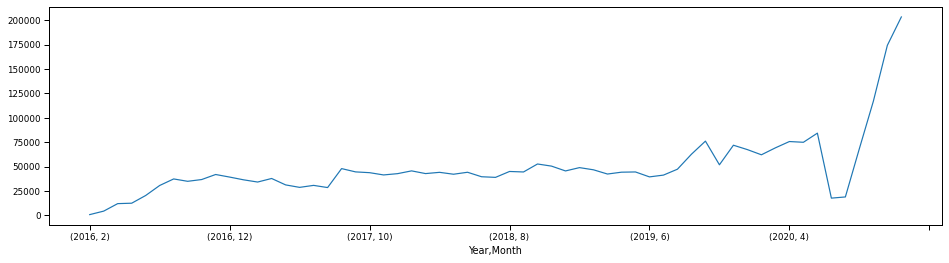

In [44]:
fig = plt.figure(figsize = (16, 4))
data.groupby(by=['Year', 'Month']).size().plot()

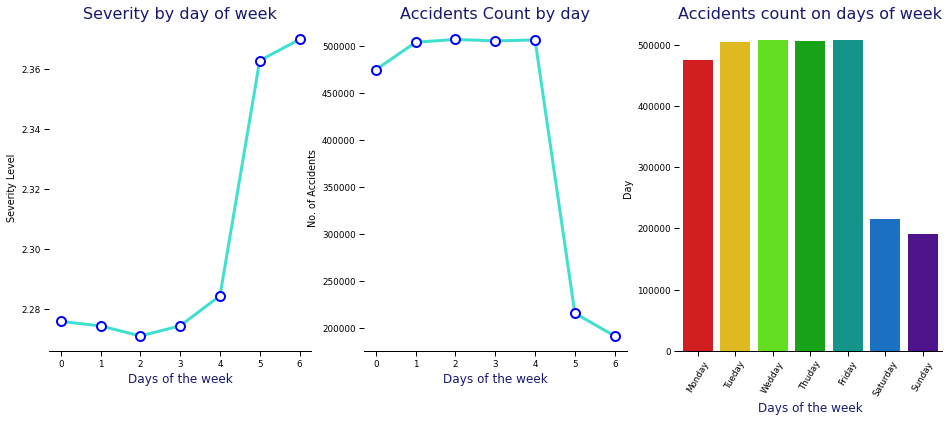

In [45]:
fig, (ax , ax2, ax3) = plt.subplots(1,3,figsize = (16,6))

sns.set_context('paper')

ax.plot(day_severity['Severity'] ,  color='Turquoise', label=day_map,linewidth=3,
           linestyle='solid',marker='.',markersize=18, markerfacecolor='w',markeredgecolor='b',markeredgewidth='2')


ax.set_xlabel("Days of the week", fontdict = {'fontsize':12 , 'color':'MidnightBlue'} )
ax.set_ylabel("Severity Level")
ax.set_title('Severity by day of week', fontdict = {'fontsize':16 , 'color':'MidnightBlue'})


ax2.plot(day_severity['Day'] ,  color='Turquoise', label=day_map,linewidth=3,
           linestyle='solid',marker='.',markersize=18, markerfacecolor='w',markeredgecolor='b',markeredgewidth='2')

ax2.set_xlabel("Days of the week", fontdict = {'fontsize':12 , 'color':'MidnightBlue'} )
ax2.set_ylabel("No. of Accidents")
ax2.set_title('Accidents Count by day', fontdict = {'fontsize':16 , 'color':'MidnightBlue'})

f2 = sns.barplot(x=day_severity['Day'].index.map(day_map) , y=day_severity['Day'], ax = ax3, palette = 'nipy_spectral_r')
plt.xticks(rotation=60)
ax3.set_xlabel("Days of the week", fontdict = {'fontsize':12 , 'color':'MidnightBlue'} )
ax3.set_title('Accidents count on days of week', fontdict = {'fontsize':16 , 'color':'MidnightBlue'})

sns.despine(left=True)

fig.show()

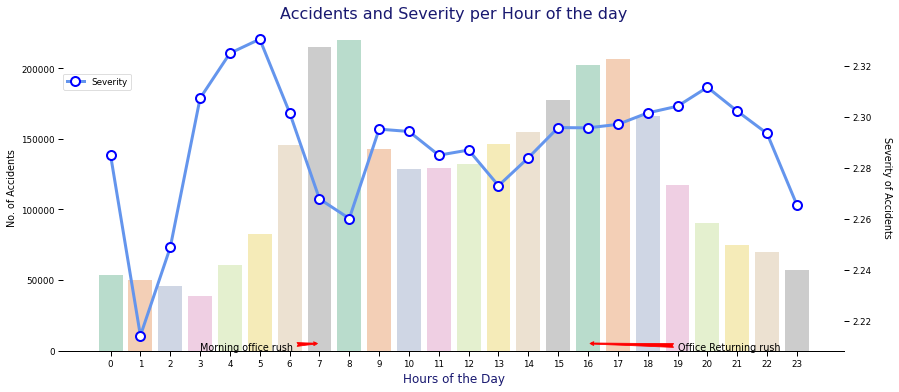

In [46]:
fig, ax = plt.subplots(1,1,figsize = (14,6))

sns.set_context('paper')

f = sns.barplot(x=hour_severity['Hour'].index , y=hour_severity['Hour'], ax = ax, palette='Pastel2')

ax2 = ax.twinx()

ax2.plot(hour_severity['Severity'] , color='CornFlowerBlue', label='Severity',linewidth=3,
           linestyle='solid',marker='.',markersize=18, markerfacecolor='w',markeredgecolor='b',markeredgewidth='2')

sns.despine(left=True)
ax2.spines[('top')].set_visible(False)
ax2.spines[('right')].set_visible(False)
ax2.spines[('left')].set_visible(False)
ax.set_xlabel("Hours of the Day", fontdict = {'fontsize':12 , 'color':'MidnightBlue'} )
ax.set_ylabel("No. of Accidents")
ax2.set_ylabel("Severity of Accidents", rotation=270 ,labelpad=20)
ax.set_title('Accidents and Severity per Hour of the day', fontdict = {'fontsize':16 , 'color':'MidnightBlue'})
ax2.legend(loc=(0,0.8))

ax.annotate('Morning office rush' , xytext=(3,500) , xy=(7,5000),arrowprops={'arrowstyle':'fancy' , 'color':'Red'})
ax.annotate('Office Returning rush' , xytext=(19,500),xy=(16,5000),arrowprops={'arrowstyle':'fancy', 'color':'Red'})

fig.show()

In [47]:
sev_4_mean = data[data['Severity'] == 4][['Severity','Year']].groupby('Year').count().mean()

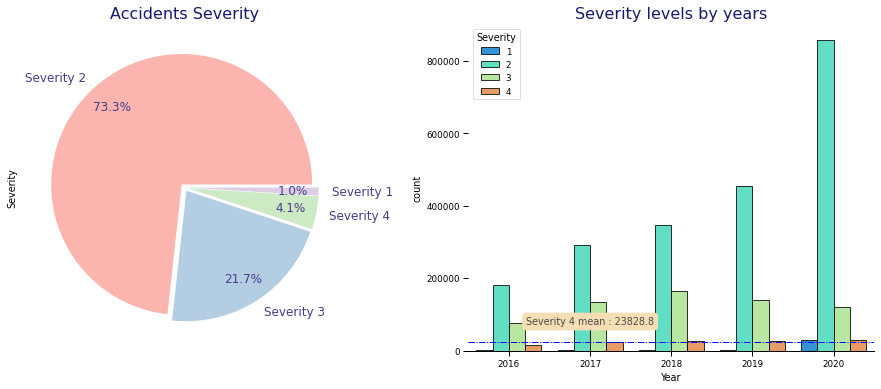

In [48]:
f , (ax1,ax2) = plt.subplots(1,2,figsize=(16,6))

data['Severity'].value_counts().plot.pie(autopct = '%1.1f%%' , ax=ax1, colors =sns.color_palette(palette='Pastel1') ,
                                      pctdistance = 0.8, explode = [.03,.03,.03,.03], 
                                       textprops = {'fontsize' : 12 , 'color' : 'DarkSlateBlue'},
                                       labels=['Severity 2','Severity 3' , 'Severity 4' , 'Severity 1']
                              )

ax1.set_title("Accidents Severity", fontdict = {'fontsize':16 , 'color':'MidnightBlue'} )


s = sns.countplot(data=data[['Severity','Year']] , x = 'Year' , hue='Severity' , ax=ax2, palette = 'rainbow' 
                  , edgecolor='black')
ax2.axhline(sev_4_mean[0] ,color='Blue', linewidth=1, linestyle='dashdot')
ax2.annotate(f"Severity 4 mean : {sev_4_mean[0]}",
            va = 'center', ha='center',
            color='#4a4a4a',
            bbox=dict(boxstyle='round', pad=0.4, facecolor='Wheat', linewidth=0),
            xy=(1,80000))

ax2.set_title("Severity levels by years", fontdict = {'fontsize':16 , 'color':'MidnightBlue'} )

sns.despine(left=True)


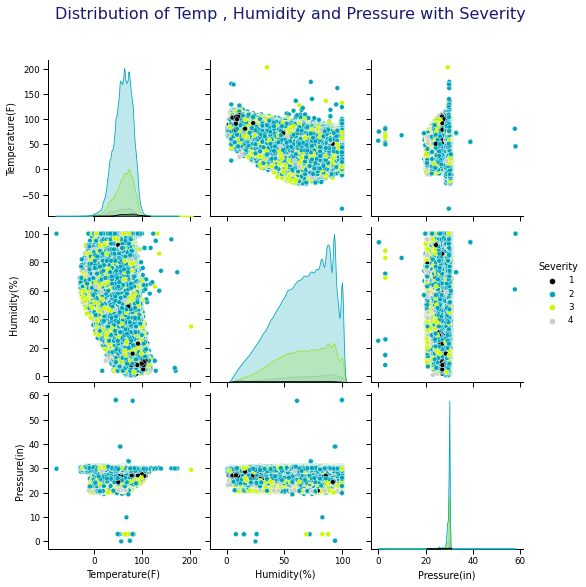

In [49]:
pair = sns.pairplot(data[['Severity','Temperature(F)','Humidity(%)','Pressure(in)']].dropna(), hue='Severity', palette='nipy_spectral')
# pair = sns.pairplot(df[['Severity','Temperature(F)']].dropna(), hue='Severity', palette='nipy_spectral')

pair.fig.suptitle('Distribution of Temp , Humidity and Pressure with Severity', y =1.08 
                  , fontsize = 16 , color = 'MidnightBlue' , ha = 'center' , va='top')

plt.show()

In [50]:
data['Severity'] = data['Severity'].astype('int')

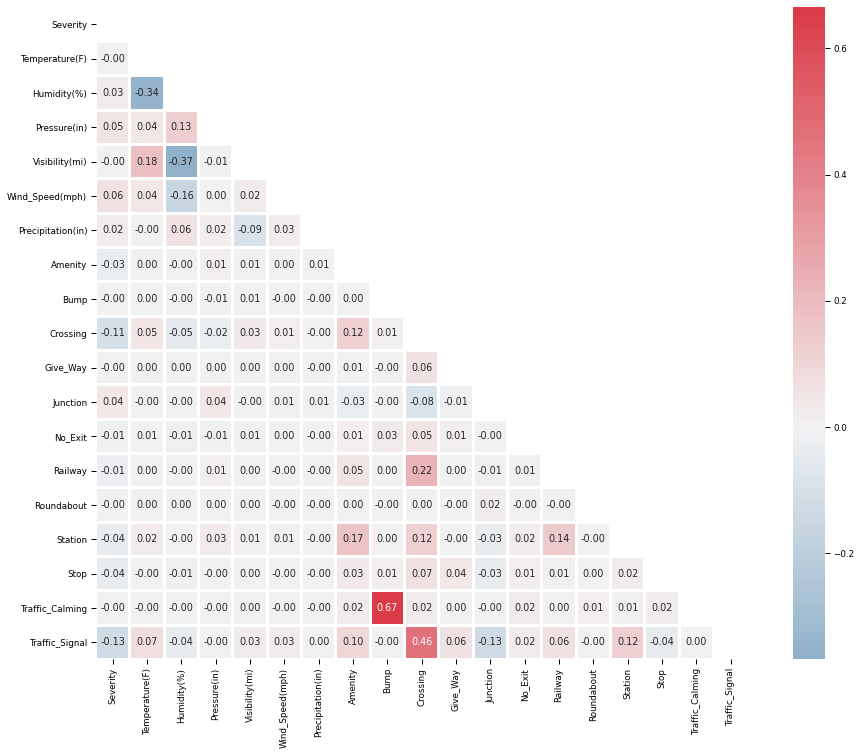

In [51]:
features = ['Severity','Temperature(F)', 'Humidity(%)', 
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 
       'Sunrise_Sunset']

mask = np.zeros_like(data[features].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


plt.figure(figsize=(16,12))
sns.heatmap(data[features].corr(), cmap=sns.diverging_palette(240, 10, as_cmap=True), square=True, 
            annot=True, fmt='.2f', center=0, linewidth=2, cbar=True , mask = mask)


plt.show()

(24.555269, 49.002201)

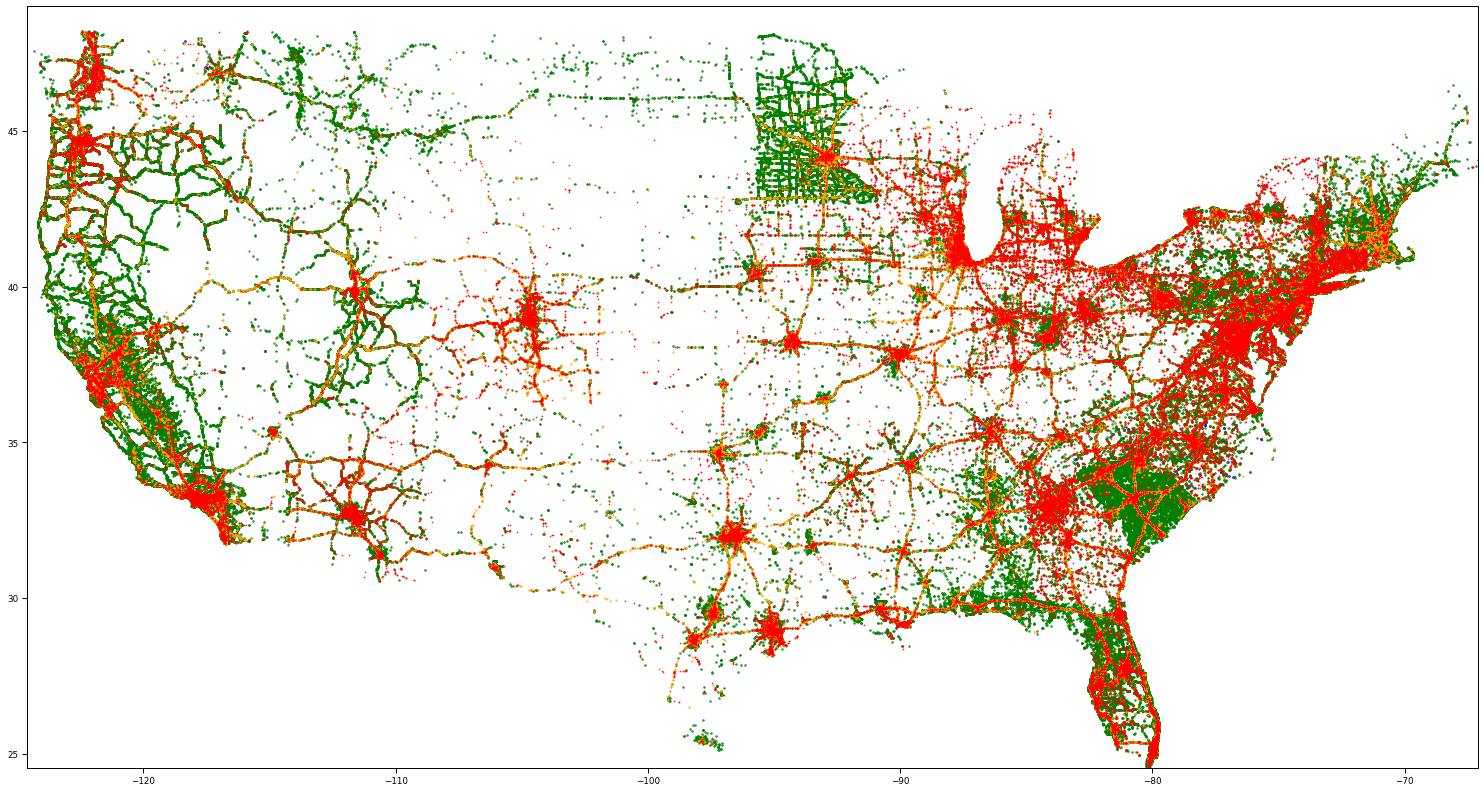

In [52]:
BBox = ((data.Start_Lng.min(), data.Start_Lng.max(), data.Start_Lat.min(), data.Start_Lat.max()))
# map_pic = plt.imread('map1.png')


fig, ax = plt.subplots(figsize = (26,14))
ax.scatter(data[data['Severity']==1].Start_Lng+0.3, data[data['Severity']==1].Start_Lat-0.8, zorder=1, alpha= 0.7, c='blue', s=4)
ax.scatter(data[data['Severity']==2].Start_Lng+0.3, data[data['Severity']==2].Start_Lat-0.8, zorder=1, alpha= 0.7, c='green', s=3)
ax.scatter(data[data['Severity']==3].Start_Lng+0.3, data[data['Severity']==3].Start_Lat-0.8, zorder=1, alpha= 0.7, c='orange', s=2)
ax.scatter(data[data['Severity']==4].Start_Lng+0.3, data[data['Severity']==4].Start_Lat-0.8, zorder=1, alpha= 0.7, c='red', s=1)

ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
# ax.imshow(map_pic, zorder=0, extent = BBox, aspect= 'auto', interpolation='none')
# ax.imshow(map_pic, zorder=2, alpha= 0.5, extent = BBox, aspect= 'auto')

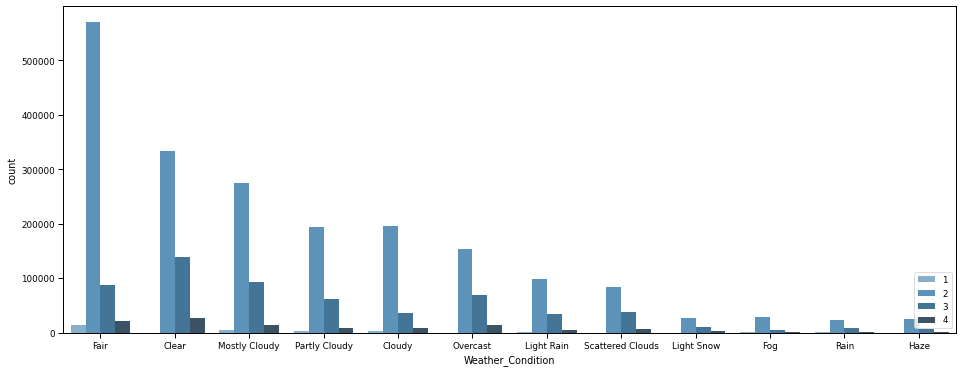

In [53]:
fig = plt.figure(figsize = (16, 6))
sns.countplot(x="Weather_Condition", data=data, order=data['Weather_Condition'].value_counts()[:12].index, hue='Severity', palette='Blues_d')
plt.legend(loc='lower right')
plt.show()